In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
# Data collection and processing

calories_df = pd.read_csv("Dataset/calories.csv")
calories_df

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [4]:
calories_df.shape

(15000, 2)

In [5]:
calories_df.head(5)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
calories_df.describe()

,User_ID,Calories
count,1.500000e+04,15000.000000
mean,1.497736e+07,89.539533
std,2.872851e+06,62.456978
min,1.000116e+07,1.000000
25%,1.247419e+07,35.000000
50%,1.499728e+07,79.000000
75%,1.744928e+07,138.000000
max,1.999965e+07,314.000000


In [7]:
print(calories_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB
None


In [8]:
exercise_df = pd.read_csv("Dataset/exercise.csv")
exercise_df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [9]:
exercise_df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
exercise_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [11]:
# Combining the two dataframes

df = pd.concat([exercise_df, calories_df["Calories"]], axis=1)
df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
df.shape

(15000, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [14]:
# Checking missing values

df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [15]:
# Data Analysis

df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [16]:
# Data visualization

sns.set()

<Axes: xlabel='Gender', ylabel='count'>

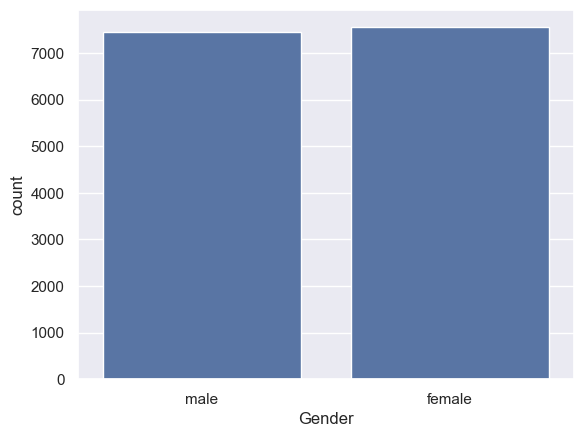

In [17]:
sns.countplot(x='Gender', data=df)

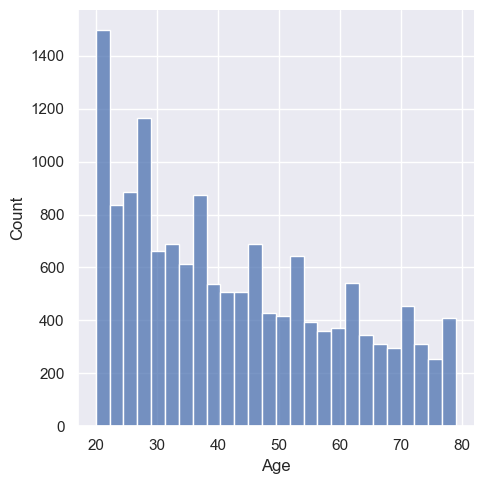

In [18]:
sns.displot(df["Age"])

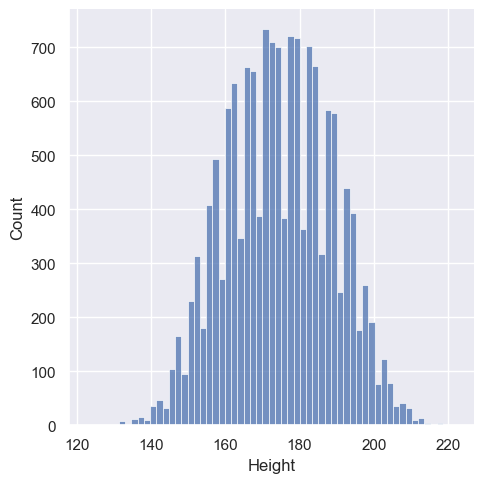

In [19]:
sns.displot(df["Height"])

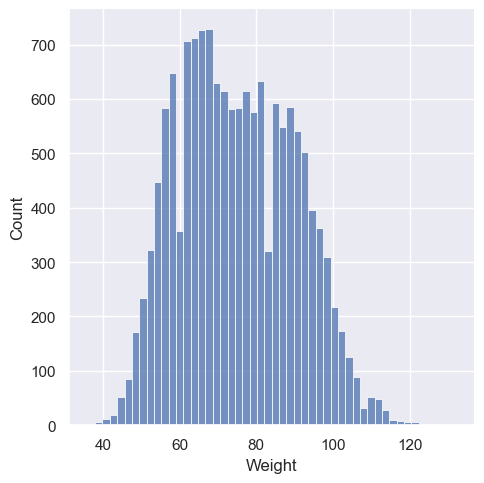

In [20]:
sns.displot(df["Weight"])

In [21]:
# Finding the correlation in the dataset
# Positive correlation [Duration and calories column (Proportional relation)]
# Negative correlation [Indirect relation]

correlation = df.corr(numeric_only=True)

<Axes: >

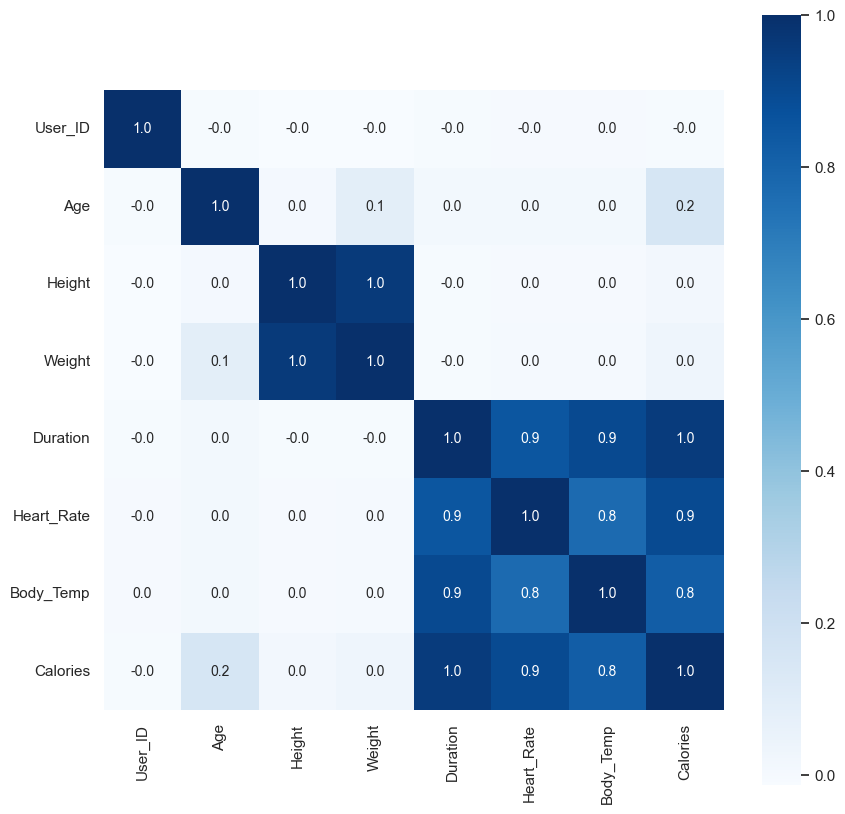

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':10}, cmap='Blues')

In [23]:
# Converting the string values into numerical vsalues

df.replace({"Gender": {'male':0, 'female':1}}, inplace=True)

In [24]:
df.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,1,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,1,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,0,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,0,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,1,26,146.0,51.0,16.0,90.0,40.2,72.0


In [25]:
# Seperating features and targets

X = df.drop(columns=['User_ID','Calories'], axis=1)
Y = df["Calories"]

In [26]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [27]:
X.head(5)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [28]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [29]:
Y.head(5)

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [32]:
print(Y.shape, Y_train.shape, Y_test.shape)

(15000,) (12000,) (3000,)


In [33]:
# Model Training
model = XGBRegressor()

In [34]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
# Evaluation

test_data_prediction = model.predict(X_test)

In [36]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [37]:
# Mean absolute error

error_score = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [38]:
print(error_score)

1.4833678883314132


In [39]:
error_score1 = metrics.r2_score(Y_test, test_data_prediction)
print(error_score1)

0.998800624504713


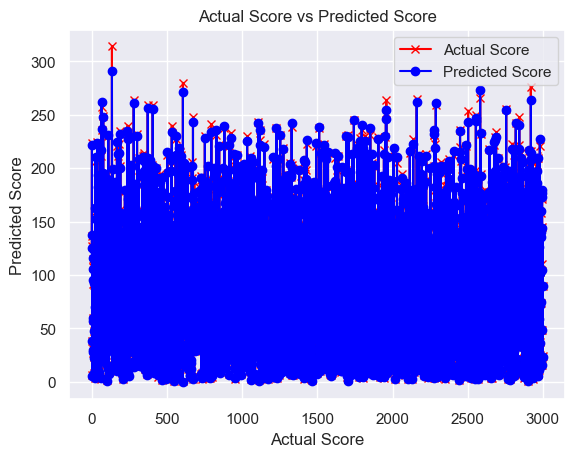

In [49]:
# Visualizing the output

index = np.arange(len(Y_test))
plt.plot(index, Y_test, label="Actual Score", color="red", marker="x")
plt.plot(index, test_data_prediction, label="Predicted Score", color="blue", marker="o")
plt.title("Actual Score vs Predicted Score")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.legend()
plt.show()

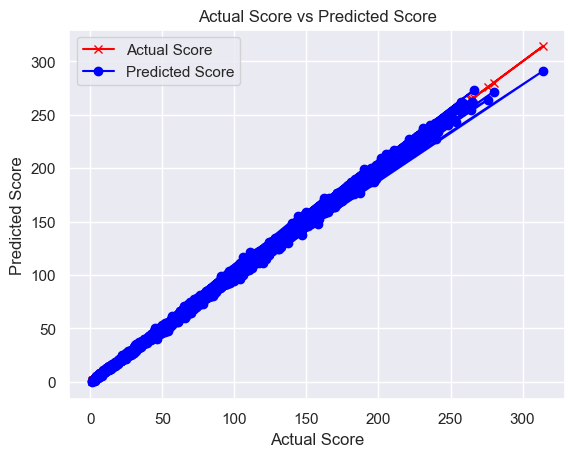

In [50]:
# Visualizing the output

index = list(Y_test)
plt.plot(index, Y_test, label="Actual Score", color="red", marker="x")
plt.plot(index, test_data_prediction, label="Predicted Score", color="blue", marker="o")
plt.title("Actual Score vs Predicted Score")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.legend()
plt.show()